In [6]:
%run Functions.ipynb            # Import Functions.ipynb, to calculate SST and thermocline depth.

%run stability.ipynb            # Import stability.ipynb, show the stability of Runge-Kutta 4th and 2nd order
                                # creator: Prof. Pier Luigi Vidale.

# Imported libraries so as to run and plot the figures
import numpy as np      
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Parameters used in all parts in exception of the time-step for the optional part in Task E:

In [7]:
w_c = np.sqrt(3/32)                # Critic frequency
tau_c = 2*np.pi/w_c                # Non-dimensionalised critical period. If dimensionalised it is approximatelly = 41 months.
t_scale = Solvers.param['t_scale'] # Time-scale (2 months)
T_IC = 1.125                       # Initial Condition for SST
h_IC = 0.                          # Initial Condition for thermocline depth
dt = 1./30.                        # Time-step
tau = 12/t_scale                   # Period for annual coupling coefficient and wind stress forcing, non_dimensionalised
tau_cor = 1./30.                   # Period for wind stress forcing

# **Task A**

This part runs for 1 period and the values used are:
- Coupling coefficient: $\mu = \frac{2}{3}$
- Non-linearity-term: $\epsilon = 0 $
- Wind stress forcing: $\xi = 0 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day

In [8]:
solver = Solvers(epsilon = 0., dt = dt)       # Class to have access to the parameters and the Runge-Kutta 4th solver.

time = np.arange(0, tau_c*t_scale, dt)        # Array with the time, dimensionalised and for 1 period
Temp_A, height_A = solver.RK4(time/t_scale, dt, T_IC, h_IC) # Runge-Kutta 4th order scheme 

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

In [9]:
plt.figure()
plt.scatter(Temp_A, height_A, c = time, cmap = "plasma", s = 5)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 1.png', dpi = 300)
plt.show()

#### Stability of Runge-Kutta 4th scheme ####

In this section it is runnder the stability.ipynb file to show the stable region of the Runge-Kutta 4th (gradient colors) and 2nd order (red lines).

Creator: Prof. Pier Luigi Vidale

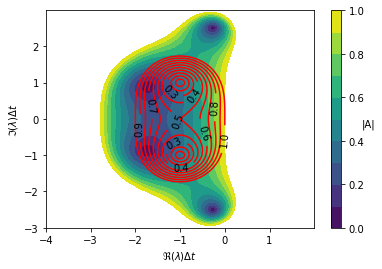

In [10]:
stability_rk4_rk2()

***

# **Task B**

This part runs for 5 periods and the values used are:
- Non-linearity-term: $\epsilon = 0 $
- Wind stress forcing: $\xi = 0 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day

### Task B.1:  $\mu > \frac{2}{3}$

For this simulation, it has been taken $\mu$ = 0.7

In [11]:
solver = Solvers(epsilon = 0., dt = dt, mu = 0.7) # Class to have access to the parameters and the Runge-Kutta 4th solver.
time = np.arange(0,tau_c*t_scale*5,dt)            # Array with the time, dimensionalised and for 5 periods

Temp_B1, height_B1 = solver.RK4(time/t_scale, dt, T_IC, h_IC) # Runge-Kutta 4th order scheme

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

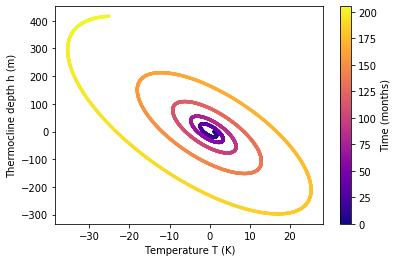

In [12]:
plt.figure()
plt.scatter(Temp_B1, height_B1, c = time, cmap = "plasma", s = 5)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 3a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K)*

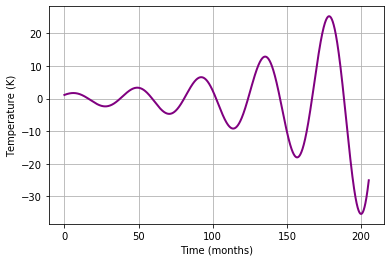

In [13]:
plt.figure()
plt.plot(time, Temp_B1, color = "purple", linewidth = 2)
plt.ylabel("Temperature (K)")
plt.xlabel("Time (months)")
plt.grid()
plt.savefig('FIG 3b.png', dpi = 300)
plt.show()

### Task B.2:  $\mu < \frac{2}{3}$

For this simulation, it has been taken $\mu$ = 0.5

In [14]:
solver = Solvers(epsilon = 0., dt = dt, mu = 0.5)

Temp_B2, height_B2 = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

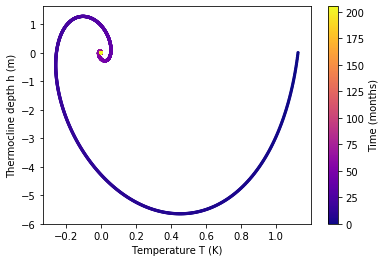

In [15]:
plt.figure()
plt.scatter(Temp_B2, height_B2, c = time, cmap = "plasma", s = 5)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 4a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K)*

In [16]:
plt.figure()
plt.plot(time, Temp_B2, color = "purple", linewidth = 2)
plt.ylabel("Temperature (K)")
plt.xlabel("Time (months)")
plt.grid()
plt.savefig('FIG 4b.png', dpi=300)
plt.show()

***
# Task C

This part runs for 5 periods and the values used are:
- Non-linearity-term: $\epsilon = 0.1 $
- Wind stress forcing: $\xi = 0 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day

### Task C.1: $\mu = \frac{2}{3}$

In [17]:
solver = Solvers(epsilon = 0.1, dt = dt)
time = np.arange(0,tau_c*t_scale*5,dt) # Array with the time, dimensionalised and for 1 period
Temp_C1, height_C1 = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

In [18]:
plt.figure()
plt.scatter(Temp_C1, height_C1, c = time, cmap = "plasma", s = 5)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 5.png', dpi = 300)
plt.show()

### Task C.2: $\mu$ increasing, until achieving a stable trajectory

In [19]:
solver = Solvers(epsilon = 0.1, dt = dt, mu = 0.8)

Temp_C2, height_C2 = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

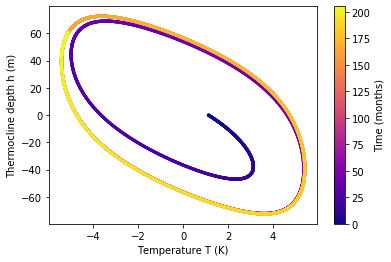

In [20]:
plt.figure()
plt.scatter(Temp_C2, height_C2, c = time, cmap = "plasma", s = 5)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 6.png', dpi=300)
plt.show()

***
# Task D

This part runs for 8 and 2 periods and the values used are:
- Non-linearity-term: $\epsilon = 0.1 $
- Wind stress forcing: $\xi = 0 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day
- Coupling coefficient varying with time: $\mu = \mu_{0} \left(1 + \mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{2\pi}{6}\right)\right)$ where:
    - $\mu_{0} = 0.75$
    - $\mu_{ann} = 0.2$ 
    - $\tau = 12$ months.

In [21]:
solver = Solvers(epsilon = 0.1, dt = dt, tau = tau, update_mu = True)
time = np.arange(0,tau_c*t_scale*8,dt) # Array with the time, dimensionalised and for 8 periods
Temp_D, height_D = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K)*

In [22]:
plt.figure()
plt.scatter(Temp_D, height_D, c = time, cmap = "plasma", s = 0.3)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 7a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) and 8 periods*

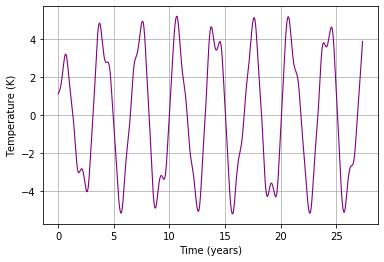

In [23]:
plt.figure()
plt.plot(time/12, Temp_D, color = "purple", linewidth = 1.1) # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 7b.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) and 2 periods*

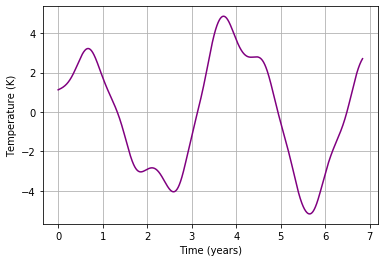

In [24]:
time = np.arange(0,tau_c*t_scale*2,dt)                # Array with the time, dimensionalised and for 8 periods
Temp_Dc = solver.RK4(time/t_scale, dt, T_IC, h_IC)[0]

plt.figure()
plt.plot(time/12, Temp_Dc, color = "purple")  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 7c.png', dpi = 300)
plt.show()

***
# Task E

This part runs for 8 and 2 periods and the values used are:
- Non-linearity-term: $\epsilon = 0.1 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day
- Coupling coefficient varying with time: $\mu = \mu_{0} \left(1 + \mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{2\pi}{6}\right)\right)$ where:
    - $\mu_{0} = 0.75$
    - $\mu_{ann} = 0.2$ 
    - $\tau = 12$ months.
- Wind stress forcing varying with time: $\xi =  f_{ann}\cos\left(\frac{2\pi t}{\tau} \right) - f_{ran}W\frac{\tau_{cor}}{\Delta t} $ where:
    - $f_{ann} = 0.02 $
    - $f_{ran} = 0.2 $
    - $\tau_{cor} = 1$ day
    - W is a random value between -1 and 1

In [25]:
time = np.arange(0, tau_c*t_scale*8, dt) # Array with the time, dimensionalised and for 8 periods

solver = Solvers(epsilon = 0.1, dt = dt, tau = tau, tau_cor = tau_cor, update_mu = True, update_xi = True)

Temp_E, height_E = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K) for 8 periods.*

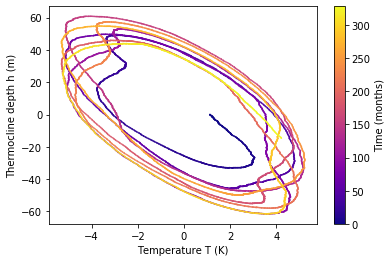

In [26]:
plt.figure("T vs h vs t")
plt.scatter(Temp_E, height_E, c = time, cmap = "plasma", s = 0.3)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (months)")
plt.savefig('FIG 8a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) for 8 periods*

In [27]:
plt.figure()
plt.plot(time/12, Temp_E, color = "purple", linewidth = 1.1)  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('IG 8b.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) for 2 periods*

In [28]:
time = np.arange(0,tau_c*t_scale*2,dt) # Array with the time, dimensionalised and for 2 periods
Temp_Ec, height_Ec = solver.RK4(time/t_scale, dt, T_IC, h_IC)

plt.figure()
plt.plot(time/12, Temp_Ec, color = "purple")  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 8c.png', dpi = 300)
plt.show()

Further, to check whether the random wind forcing maintains the ENSO, it is used a value for the coupling coefficient $\mu = 0.5$. Model runned for 12 periods.

In [29]:
time = np.arange(0, tau_c*t_scale*12, dt) # Array with the time, dimensionalised and for 12 periods

solver = Solvers(epsilon = 0.1, mu = 0.5, dt = dt, tau = tau, tau_cor = tau_cor, update_xi = True)

Temp_E_extra, height_E_extra = solver.RK4(time/t_scale, dt, T_IC, h_IC)

*Trajectory plot of Thermocline depth* h *(m) vs SST* T *(K) for 12 periods*

In [30]:
plt.figure()
plt.scatter(Temp_E_extra, height_E_extra, c = time/12, cmap = "plasma", s = 1.2)
plt.ylabel("Thermocline depth h (m)")
plt.xlabel("Temperature T (K)")
plt.colorbar(label = "Time (years)")
plt.savefig('FIG 9a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) for 12 periods*

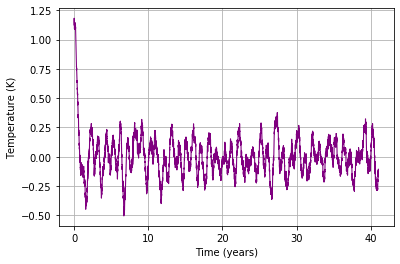

In [31]:
plt.figure()
plt.plot(time/12, Temp_E_extra, color = "purple", linewidth = 1.1)  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 9b.png', dpi = 300)
plt.show()

### Task E - Optional: Changing time-steps ###

This part runs for 8 periods and the values used are:
- Non-linearity-term: $\epsilon = 0.1 $
- Coupling coefficient varying with time: $\mu = \mu_{0} \left(1 + \mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{2\pi}{6}\right)\right)$ where:
    - $\mu_{0} = 0.75$
    - $\mu_{ann} = 0.2$ 
    - $\tau = 12$ months.
- Wind stress forcing varying with time: $\xi =  f_{ann}\cos\left(\frac{2\pi t}{\tau} \right) - f_{ran}W\frac{\tau_{cor}}{\Delta t} $ where:
    - $f_{ann} = 0.02 $
    - $f_{ran} = 0.2 $
    - $\tau_{cor} = 1$ day
    - W is a random value between -1 and 1

*Time-series of SST* T *(K) for 8 periods and $\Delta t = 6$ months*

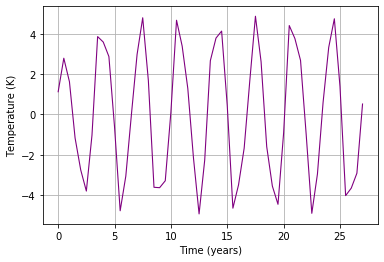

In [32]:
dt_6mo = 6. # Time-step of 6 month
time = np.arange(0, tau_c*t_scale*8, dt_6mo) # Array with the time, dimensionalised and for 8 periods

solver = Solvers(epsilon = 0.1, dt = dt_6mo, tau = tau, tau_cor = tau_cor, update_mu = True, update_xi = True)

Temp_E_6mo = solver.RK4(time/t_scale, dt_6mo, T_IC, h_IC)[0] # Dimensionalised SST

plt.figure()
plt.plot(time/12, Temp_E_6mo, color = "purple", linewidth = 1.1)  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 10a.png', dpi = 300)
plt.show()

*Time-series of SST* T *(K) for 8 periods and $\Delta t = 1.1$ years*

C:\Users\inesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: overflow encountered in double_scalars
C:\Users\inesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


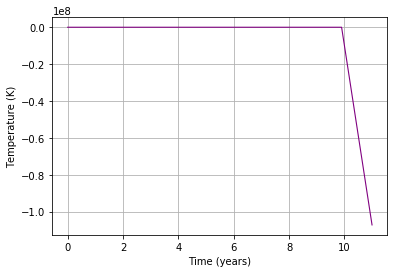

In [33]:
dt_1yr = 12*1.1 # Time-step of 1.1 years
time = np.arange(0, tau_c*t_scale*8, dt_1yr) # Array with the time, dimensionalised and for 8 periods

solver = Solvers(epsilon = 0.1, dt = dt_1yr, tau = tau, tau_cor = tau_cor, update_mu = True, update_xi = True)

Temp_E_1yr = solver.RK4(time/t_scale, dt_1yr, T_IC, h_IC)[0] # Dimensionalised SST

plt.figure()
plt.plot(time/12, Temp_E_1yr, color = "purple", linewidth = 1.1)  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 10b.png', dpi=300)
plt.show()

*Time-series of SST* T *(K) for 8 periods and $\Delta t = 0.1$ days*

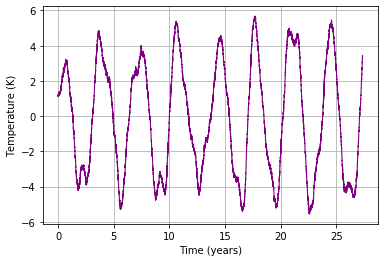

In [34]:
dt_01day = 0.1/30. # Time step of 0.1 days
time = np.arange(0, tau_c*t_scale*8, dt_01day) # Array with the time, dimensionalised and for 8 periods

solver = Solvers(epsilon = 0.1, dt = dt_01day, tau = tau, tau_cor = tau_cor, update_mu = True, update_xi = True)

Temp_01day = solver.RK4(time/t_scale, dt_01day, T_IC, h_IC)[0] # Dimensionalised Temperature

plt.figure()
plt.plot(time/12, Temp_01day, color = "purple", linewidth = 1.1)  # Transform months into years
plt.ylabel("Temperature (K)")
plt.xlabel("Time (years)")
plt.grid()
plt.savefig('FIG 10c.png', dpi = 300)
plt.show()

***
# Task F

In this Task, it is generated plumes so as to check the sensitivity of Jin's model to initial conditions. This part runs for 7 periods and the values used are:
- Non-linearity-term: $\epsilon = 0.1 $
- Time-step: $\Delta t = \frac{1}{30}$ of month or 1 day
- Coupling coefficient varying with time: $\mu = \mu_{0} \left(1 + \mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{2\pi}{6}\right)\right)$ where:
    - $\mu_{0} = 0.75$
    - $\mu_{ann} = 0.2$ 
    - $\tau = 12$ months.
- Wind stress forcing varying with time: $\xi =  f_{ann}\cos\left(\frac{2\pi t}{\tau} \right) - f_{ran}W\frac{\tau_{cor}}{\Delta t} $ where:
    - $f_{ann} = 0.02 $
    - $f_{ran} = 0.2 $
    - $\tau_{cor} = 1$ day
    - W is a random value between -1 and 1

*Time-series of SST* T *(K) for 7 periods and $\Delta t = 1$ day and 10 different ensembles, perturbing the initial conditions*

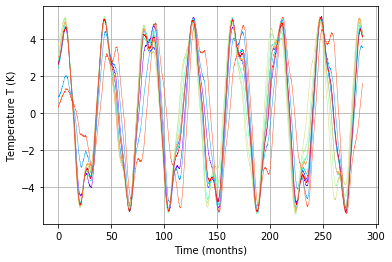

In [35]:
time = np.arange(0,tau_c*t_scale*7,dt) # Array with the time, dimensionalised and for 7 periods

solver = Solvers(epsilon = 0.1, dt = dt, tau = tau, tau_cor = tau_cor, update_mu = True, update_xi = True)

colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(10):
    # This loop calculates each the trajectory for different ensembles, perturbatinf the initial conditions
    
    T = T_IC + np.random.uniform(-1,1)*3 # Initial conditions for temperature perturbed with a random value
    h = h_IC + np.random.uniform(-1,1)*3 # Initial conditions for thermocline depth perturbed with a random value

    Temp_F = solver.RK4(time, dt, T, h)[0]
        
    plt.figure("T vs time")
    plt.plot(time, Temp_F, label = 'T = '+str(T) + 'K, h = ' + str(h) + 'm', color = colors[i], linewidth = 0.5)
    plt.xlabel("Time (months)")
    plt.ylabel("Temperature T (K)")
    
plt.grid()
plt.savefig('FIG 11.png', dpi = 300)
plt.show()

*Trajectory for 7 periods and $\Delta t = 1$ day and 10 different ensembles, perturbing the initial conditions*

In [36]:
time = np.arange(0,tau_c*t_scale*7,dt) # Array with the time, dimensionalised and for 7 periods
solver = Solvers(epsilon = 0.1, dt = 1./30., tau = tau, tau_cor = 1./30., update_mu = True, update_xi = True)

fig = plt.figure()
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(10):
    # This loop calculates each the trajectory for different ensembles, perturbatinf the initial conditions
    
    T = 1.125 + np.random.uniform(-1,1)*3 # Initial conditions for temperature perturbed with a random value
    h = 0. + np.random.uniform(-1,1)*3    # Initial conditions for thermocline depth perturbed with a random value

    Temp_F_ens, height_F_ens = solver.RK4(time, dt, T, h)
           
    ax = fig.gca(projection = '3d')
    
    xdata = Temp_F_ens
    ydata = time
    zdata = height_F_ens
    
    ax.set_xlabel('T (K)')
    ax.set_ylabel('Time (months)')
    ax.set_zlabel('h (m)')
    
    ax.plot3D(xdata,ydata,zdata, linewidth = 0.7, color = colors[i])
    fig.tight_layout()
    
plt.grid()
plt.savefig('FIG 12.png', dpi = 300)
plt.show()